In [89]:
! pip install yfinance
import json
import pandas   as pd   
import yfinance as yf
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [135]:
ticker = 'AMD'
ticker = "MCB"
interval='5m'
period='1d'

In [136]:
st = yf.Ticker(ticker)
info = st.info
div = info.get('trailingAnnualDividendYield')
print(ticker, div)

MCB 0.0


In [137]:
info

{'symbol': 'MCB',
 'twoHundredDayAverageChangePercent': -0.5960522,
 'fiftyTwoWeekLowChangePercent': 0.81402016,
 'averageAnalystRating': '2.0 - Buy',
 'language': 'en-US',
 'preMarketChangePercent': 13.564664,
 'earningsTimestampEnd': 1682337600,
 'regularMarketDayRange': '22.05 - 35.02',
 'epsForward': 9.65,
 'regularMarketDayHigh': 35.02,
 'twoHundredDayAverageChange': -37.4204,
 'askSize': 9,
 'twoHundredDayAverage': 62.7804,
 'bookValue': 52.594,
 'marketCap': 277973504,
 'fiftyTwoWeekHighChange': -79.479,
 'fiftyTwoWeekRange': '13.98 - 104.839',
 'fiftyDayAverageChange': -25.4216,
 'exchangeDataDelayedBy': 0,
 'firstTradeDateMilliseconds': 1510151400000,
 'averageDailyVolume3Month': 312475,
 'trailingAnnualDividendRate': 0.0,
 'fiftyTwoWeekLow': 13.98,
 'regularMarketVolume': 5987194,
 'market': 'us_market',
 'quoteSourceName': 'Nasdaq Real Time Price',
 'messageBoardId': 'finmb_58797797',
 'priceHint': 2,
 'exchange': 'NYQ',
 'sourceInterval': 15,
 'regularMarketDayLow': 22.05,


In [138]:
print(f"{info.get('longName')} ({info.get('symbol')})")
print(f"{info.get('fullExchangeName')} | Currency in {info.get('financialCurrency')}\n")
print(f"{info.get('regularMarketPrice')} {info.get('regularMarketChange')} ({info.get('regularMarketChangePercent')})\n")   
print(f"Previous Close: {info.get('regularMarketPreviousClose')}")
print(f"Bid: {info.get('bid')}")
print(f"Ask: {info.get('ask')}")
print(f"Open: {info.get('regularMarketOpen')}")
print(f"Day's Range: {info.get('regularMarketDayRange')}")
print(f"52 Week Range: {info.get('fiftyTwoWeekRange')}")
print(f"Volume: {info.get('regularMarketVolume')}")
print(f"Avg. Volume: {info.get('averageDailyVolume3Month')}")
print(f"Market Cap: {info.get('marketCap')}")
print(f"PE Ratio (TTM): {info.get('trailingPE')}")
print(f"EPS (TTM): {info.get('epsTrailingTwelveMonths')}")
print(f"Forward Dividend & Yield: {info.get('trailingAnnualDividendYield')}")

Metropolitan Bank Holding Corp. (MCB)
NYSE | Currency in USD

25.36 -9.66 (-27.584236)

Previous Close: 35.02
Bid: 28.67
Ask: 29.0
Open: 35.02
Day's Range: 22.05 - 35.02
52 Week Range: 13.98 - 104.839
Volume: 5987194
Avg. Volume: 312475
Market Cap: 277973504
PE Ratio (TTM): 4.793951
EPS (TTM): 5.29
Forward Dividend & Yield: 0.0


In [139]:
data = st.history(interval='5m',period='1d')
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-03-30 09:30:00-04:00,35.020000,35.020000,34.520000,34.540001,11422,0.0,0.0
2023-03-30 09:35:00-04:00,34.380001,34.419998,33.849998,34.240002,8247,0.0,0.0
2023-03-30 09:40:00-04:00,34.005001,34.132702,33.671398,33.830002,14071,0.0,0.0
2023-03-30 09:45:00-04:00,33.965000,34.110001,33.709999,33.990002,10783,0.0,0.0
2023-03-30 09:50:00-04:00,33.660000,33.709000,33.250000,33.250000,13256,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-30 15:35:00-04:00,24.588200,26.540001,24.587400,25.930000,290708,0.0,0.0
2023-03-30 15:40:00-04:00,25.855700,25.920000,25.100000,25.320000,152198,0.0,0.0
2023-03-30 15:45:00-04:00,25.400000,25.649900,25.050100,25.440001,106370,0.0,0.0


<Axes: xlabel='Datetime'>

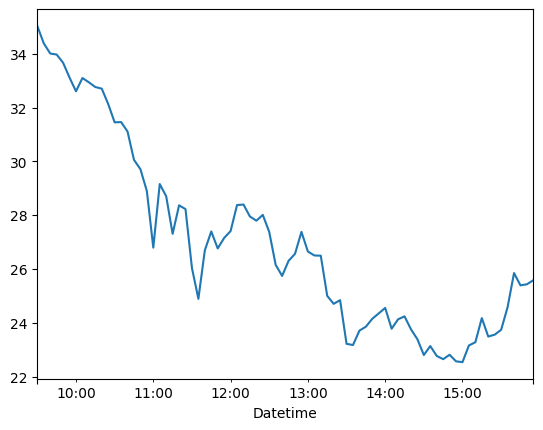

In [140]:
data.Open.plot()

https://finance.yahoo.com/quote/MCB?p=MCB

In [141]:
df = data["Open"]
trade_prices = df.to_json(orient="table")
trade_prices

'{"schema":{"fields":[{"name":"Datetime","type":"datetime","tz":"America\\/New_York"},{"name":"Open","type":"number"}],"primaryKey":["Datetime"],"pandas_version":"1.4.0"},"data":[{"Datetime":"2023-03-30T13:30:00.000Z","Open":35.0200004578},{"Datetime":"2023-03-30T13:35:00.000Z","Open":34.3800010681},{"Datetime":"2023-03-30T13:40:00.000Z","Open":34.0050010681},{"Datetime":"2023-03-30T13:45:00.000Z","Open":33.9650001526},{"Datetime":"2023-03-30T13:50:00.000Z","Open":33.6599998474},{"Datetime":"2023-03-30T13:55:00.000Z","Open":33.1100006104},{"Datetime":"2023-03-30T14:00:00.000Z","Open":32.6010017395},{"Datetime":"2023-03-30T14:05:00.000Z","Open":33.0950012207},{"Datetime":"2023-03-30T14:10:00.000Z","Open":32.9350013733},{"Datetime":"2023-03-30T14:15:00.000Z","Open":32.7599983215},{"Datetime":"2023-03-30T14:20:00.000Z","Open":32.7000007629},{"Datetime":"2023-03-30T14:25:00.000Z","Open":32.1300010681},{"Datetime":"2023-03-30T14:30:00.000Z","Open":31.4500007629},{"Datetime":"2023-03-30T14:3

In [142]:
info["trade_prices"] = trade_prices
info

{'symbol': 'MCB',
 'twoHundredDayAverageChangePercent': -0.5960522,
 'fiftyTwoWeekLowChangePercent': 0.81402016,
 'averageAnalystRating': '2.0 - Buy',
 'language': 'en-US',
 'preMarketChangePercent': 13.564664,
 'earningsTimestampEnd': 1682337600,
 'regularMarketDayRange': '22.05 - 35.02',
 'epsForward': 9.65,
 'regularMarketDayHigh': 35.02,
 'twoHundredDayAverageChange': -37.4204,
 'askSize': 9,
 'twoHundredDayAverage': 62.7804,
 'bookValue': 52.594,
 'marketCap': 277973504,
 'fiftyTwoWeekHighChange': -79.479,
 'fiftyTwoWeekRange': '13.98 - 104.839',
 'fiftyDayAverageChange': -25.4216,
 'exchangeDataDelayedBy': 0,
 'firstTradeDateMilliseconds': 1510151400000,
 'averageDailyVolume3Month': 312475,
 'trailingAnnualDividendRate': 0.0,
 'fiftyTwoWeekLow': 13.98,
 'regularMarketVolume': 5987194,
 'market': 'us_market',
 'quoteSourceName': 'Nasdaq Real Time Price',
 'messageBoardId': 'finmb_58797797',
 'priceHint': 2,
 'exchange': 'NYQ',
 'sourceInterval': 15,
 'regularMarketDayLow': 22.05,


In [143]:
# Serializing json  
json_object = json.dumps(info) 
print(json_object)

{"symbol": "MCB", "twoHundredDayAverageChangePercent": -0.5960522, "fiftyTwoWeekLowChangePercent": 0.81402016, "averageAnalystRating": "2.0 - Buy", "language": "en-US", "preMarketChangePercent": 13.564664, "earningsTimestampEnd": 1682337600, "regularMarketDayRange": "22.05 - 35.02", "epsForward": 9.65, "regularMarketDayHigh": 35.02, "twoHundredDayAverageChange": -37.4204, "askSize": 9, "twoHundredDayAverage": 62.7804, "bookValue": 52.594, "marketCap": 277973504, "fiftyTwoWeekHighChange": -79.479, "fiftyTwoWeekRange": "13.98 - 104.839", "fiftyDayAverageChange": -25.4216, "exchangeDataDelayedBy": 0, "firstTradeDateMilliseconds": 1510151400000, "averageDailyVolume3Month": 312475, "trailingAnnualDividendRate": 0.0, "fiftyTwoWeekLow": 13.98, "regularMarketVolume": 5987194, "market": "us_market", "quoteSourceName": "Nasdaq Real Time Price", "messageBoardId": "finmb_58797797", "priceHint": 2, "exchange": "NYQ", "sourceInterval": 15, "regularMarketDayLow": 22.05, "shortName": "Metropolitan Ban